# Libraries 📚

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import  OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# our data 🧐

In [2]:
pricing_df = pd.read_csv("get_around_pricing_project.csv")
pricing_df.head()

,Unnamed: 0,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day
0,0,Citroën,140411,100,diesel,black,convertible,True,True,False,False,True,True,True,106
1,1,Citroën,13929,317,petrol,grey,convertible,True,True,False,False,False,True,True,264
2,2,Citroën,183297,120,diesel,white,convertible,False,False,False,False,True,False,True,101
3,3,Citroën,128035,135,diesel,red,convertible,True,True,False,False,True,True,True,158
4,4,Citroën,97097,160,diesel,silver,convertible,True,True,False,False,False,True,True,183


In [10]:
pricing_df.shape

(4843, 15)

In [3]:
pricing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Unnamed: 0                 4843 non-null   int64 
 1   model_key                  4843 non-null   object
 2   mileage                    4843 non-null   int64 
 3   engine_power               4843 non-null   int64 
 4   fuel                       4843 non-null   object
 5   paint_color                4843 non-null   object
 6   car_type                   4843 non-null   object
 7   private_parking_available  4843 non-null   bool  
 8   has_gps                    4843 non-null   bool  
 9   has_air_conditioning       4843 non-null   bool  
 10  automatic_car              4843 non-null   bool  
 11  has_getaround_connect      4843 non-null   bool  
 12  has_speed_regulator        4843 non-null   bool  
 13  winter_tires               4843 non-null   bool  
 14  rental_p

In [11]:
pricing_df.drop("Unnamed: 0", axis=1, inplace=True)

In [12]:
pricing_df.describe(include="all")

,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day
count,4843,4.843000e+03,4843.00000,4843,4843,4843,4843,4843,4843,4843,4843,4843,4843,4843.000000
unique,28,NaN,NaN,4,10,8,2,2,2,2,2,2,2,NaN
top,Citroën,NaN,NaN,diesel,black,estate,True,True,False,False,False,False,True,NaN
freq,969,NaN,NaN,4641,1633,1606,2662,3839,3865,3881,2613,3674,4514,NaN
mean,NaN,1.409628e+05,128.98823,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,121.214536
std,NaN,6.019674e+04,38.99336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.568268
min,NaN,-6.400000e+01,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.000000
25%,NaN,1.029135e+05,100.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104.000000
50%,NaN,1.410800e+05,120.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,119.000000
75%,NaN,1.751955e+05,135.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,136.000000


In [6]:
pricing_df.isnull().sum().sum()

0

In [8]:
pricing_df.duplicated().sum()

0

In [14]:
pricing_df.head()

,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day
0,Citroën,140411,100,diesel,black,convertible,True,True,False,False,True,True,True,106
1,Citroën,13929,317,petrol,grey,convertible,True,True,False,False,False,True,True,264
2,Citroën,183297,120,diesel,white,convertible,False,False,False,False,True,False,True,101
3,Citroën,128035,135,diesel,red,convertible,True,True,False,False,True,True,True,158
4,Citroën,97097,160,diesel,silver,convertible,True,True,False,False,False,True,True,183


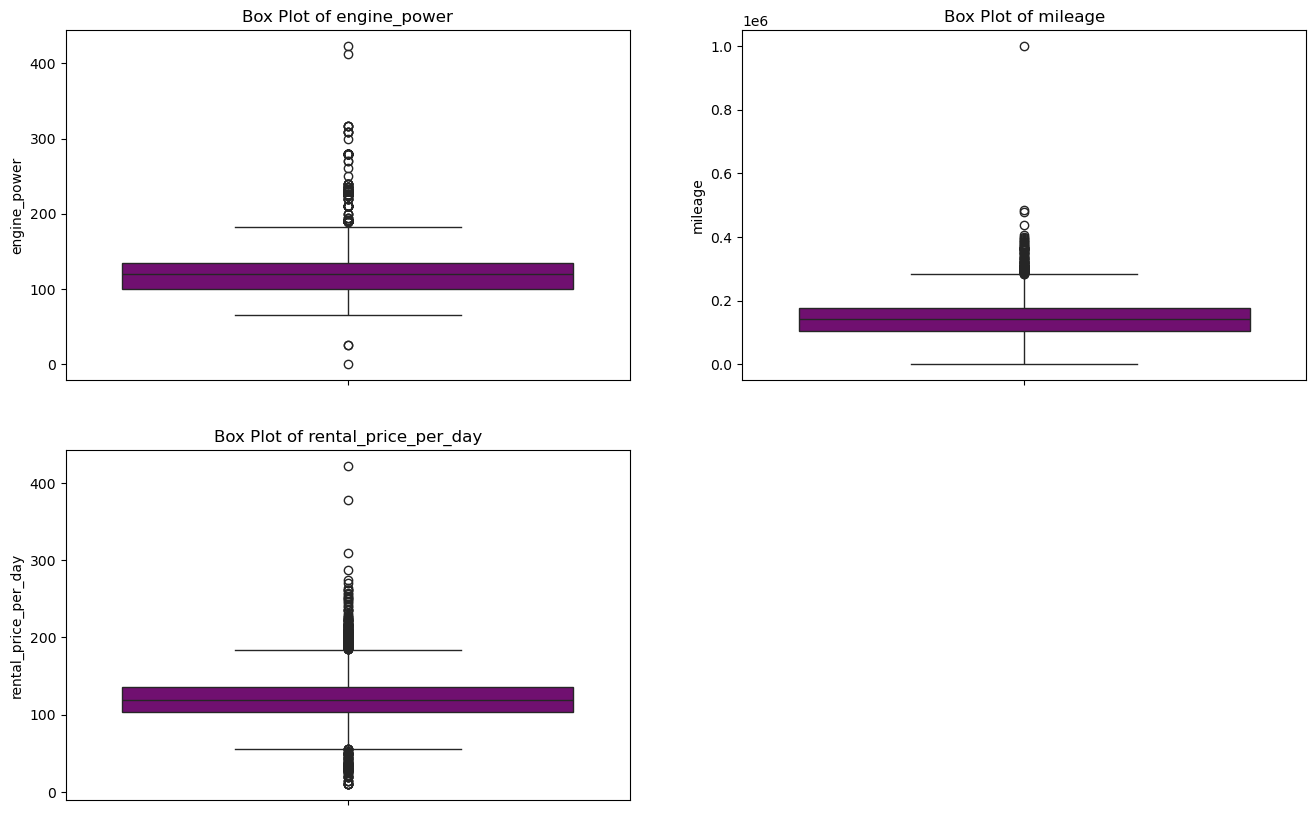

In [16]:
plt.figure(figsize=(16, 10))
#outlier_plt=plt.style.use('dark_background')
	

columns_to_check = ['engine_power', 'mileage', 'rental_price_per_day']


for i, column in enumerate(columns_to_check):
    plt.subplot(2, 2, i + 1) 
    sns.boxplot(data=pricing_df, y=column, color="purple")
    plt.title(f'Box Plot of {column}')
    plt.ylabel(column)

plt.show()

In [17]:
for column in columns_to_check:
    mean = pricing_df[column].mean()
    std = pricing_df[column].std()
    
    lower_bound = mean - 3 * std
    upper_bound = mean + 3 * std
    
    pricing_clean = pricing_df[(pricing_df[column] >= lower_bound) & (pricing_df[column] <= upper_bound)]

print(f"DataFrame shape before dropping outliers: {pricing_df.shape}")
print(f"DataFrame shape after dropping outliers: {pricing_clean.shape}")

DataFrame shape before dropping outliers: (4843, 14)
DataFrame shape after dropping outliers: (4789, 14)


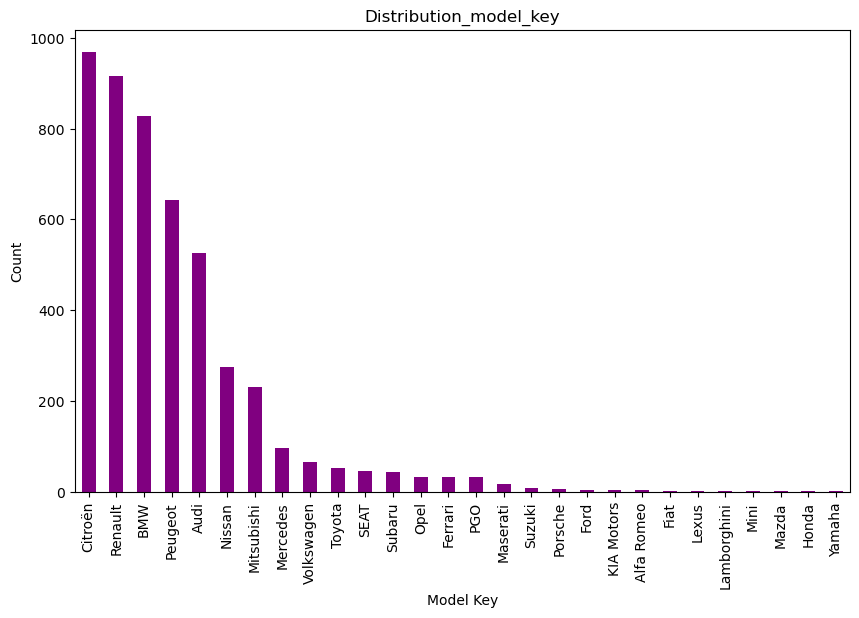

In [21]:
model_key_counts = pricing_df['model_key'].value_counts()

plt.figure(figsize=(10,6))
model_key_counts.plot(kind='bar', color = "purple")
plt.title('Distribution_model_key')
plt.xlabel('Model Key')
plt.ylabel('Count')
plt.show()

In [63]:
model_counts = pricing_clean['model_key'].value_counts()
models_to_remove = model_counts[model_counts == 1].index
pricing_clean = pricing_clean[~pricing_clean['model_key'].isin(models_to_remove)]

In [127]:
pricing_clean.rename(columns={"model_key":"car"}, inplace=True)

# Machine learning 👩‍💻

### Preprocessing 🛠

In [128]:
print("Separating labels from features...")
target_variable = "rental_price_per_day"

X = pricing_clean.drop(target_variable, axis = 1)
Y = pricing_clean.loc[:,target_variable]

print("...Done.")

Separating labels from features...
...Done.


In [129]:
pricing_clean.head()

,car,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day
0,Citroën,140411,100,diesel,black,convertible,True,True,False,False,True,True,True,106
2,Citroën,183297,120,diesel,white,convertible,False,False,False,False,True,False,True,101
3,Citroën,128035,135,diesel,red,convertible,True,True,False,False,True,True,True,158
4,Citroën,97097,160,diesel,silver,convertible,True,True,False,False,False,True,True,183
5,Citroën,152352,225,petrol,black,convertible,True,True,False,False,True,True,True,131


In [137]:
numeric_features = ['mileage','engine_power']
print(numeric_features)
categorical_features =['car', 'fuel', 'paint_color', 'car_type',
       'private_parking_available', 'has_gps', 'has_air_conditioning',
       'automatic_car', 'has_getaround_connect', 'has_speed_regulator',
       'winter_tires']
print(categorical_features)

['mileage', 'engine_power']
['car', 'fuel', 'paint_color', 'car_type', 'private_parking_available', 'has_gps', 'has_air_conditioning', 'automatic_car', 'has_getaround_connect', 'has_speed_regulator', 'winter_tires']


In [138]:
type(pricing_clean.iloc[0,1])

numpy.int64

In [132]:
pricing_clean.rename(columns={"model_key":"car"}, inplace=True)

In [133]:
pricing_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4785 entries, 0 to 4842
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   car                        4785 non-null   object
 1   mileage                    4785 non-null   int64 
 2   engine_power               4785 non-null   int64 
 3   fuel                       4785 non-null   object
 4   paint_color                4785 non-null   object
 5   car_type                   4785 non-null   object
 6   private_parking_available  4785 non-null   bool  
 7   has_gps                    4785 non-null   bool  
 8   has_air_conditioning       4785 non-null   bool  
 9   automatic_car              4785 non-null   bool  
 10  has_getaround_connect      4785 non-null   bool  
 11  has_speed_regulator        4785 non-null   bool  
 12  winter_tires               4785 non-null   bool  
 13  rental_price_per_day       4785 non-null   int64 
dtypes: bool(7), i

In [139]:

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [140]:
numeric_transformer = StandardScaler()
categorical_transformer = Pipeline(
    steps=[
    ('encoder', OneHotEncoder(drop='first')) 
    ])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])



In [141]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Linear regression 📈

In [142]:
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [143]:
Y_train_pred = regressor.predict(X_train)
Y_test_pred = regressor.predict(X_test)

In [144]:
print("R2 score on training set : ", r2_score(Y_train, Y_train_pred))
print("R2 score on test set : ", r2_score(Y_test, Y_test_pred))

R2 score on training set :  0.7137735901696096
R2 score on test set :  0.7309389635359556


In [123]:
coefficients = regressor.coef_

num_features = numeric_features
cat_features = preprocessor.named_transformers_['cat']['encoder'].get_feature_names_out(categorical_features)

all_feature_names = np.concatenate([num_features, cat_features])
coeff_df = pd.DataFrame(coefficients, all_feature_names, columns=['Coefficient'])


print(coeff_df)

                                Coefficient
mileage                          -12.175889
engine_power                      12.636865
model_key_Audi                     8.135245
model_key_BMW                      3.867811
model_key_Citroën                  0.985660
model_key_Ferrari                 13.341093
model_key_Fiat                   -35.626702
model_key_Ford                   -15.687362
model_key_KIA Motors               8.331673
model_key_Lamborghini              1.101463
model_key_Lexus                   18.469664
model_key_Maserati                11.321785
model_key_Mercedes                19.460277
model_key_Mitsubishi              17.587445
model_key_Nissan                  -3.933226
model_key_Opel                    24.613956
model_key_PGO                     -7.974041
model_key_Peugeot                  5.450374
model_key_Porsche                 29.189845
model_key_Renault                 12.092972
model_key_SEAT                    28.510864
model_key_Subaru                

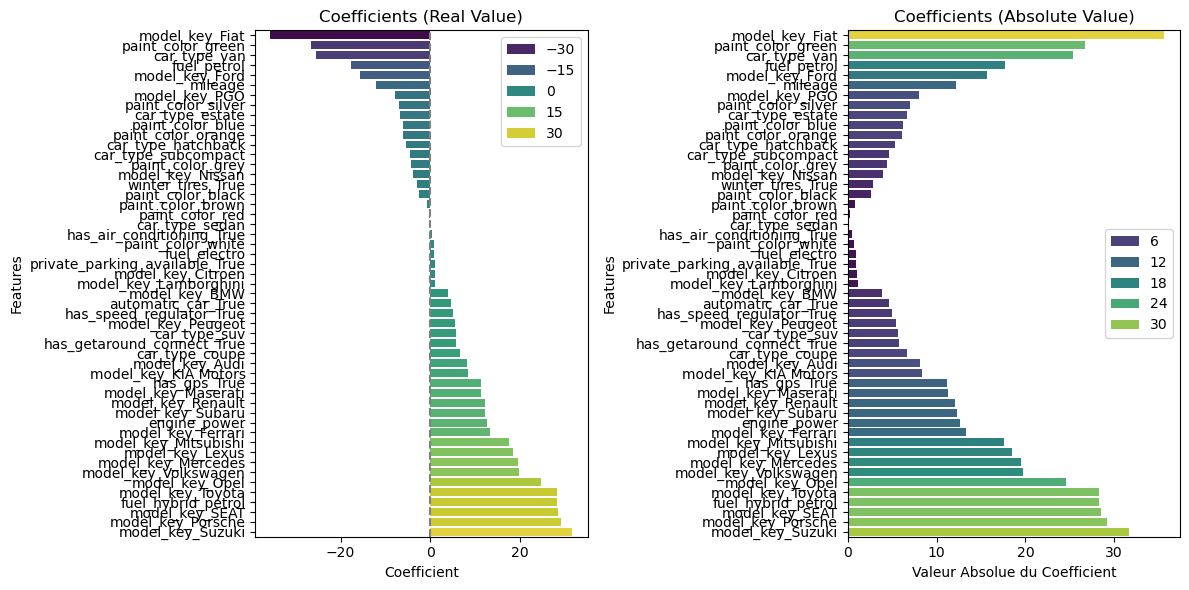

In [77]:

coeff_df = coeff_df.sort_values(by='Coefficient')  
feature_names = coeff_df.index  
coeff_values = coeff_df['Coefficient'].values 


plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
sns.barplot(x=coeff_values, y=feature_names,hue=coeff_values, palette='viridis')
plt.axvline(0, color='gray', linestyle='--') 
plt.title('Coefficients (Real Value)')
plt.xlabel('Coefficient')
plt.ylabel('Features')


plt.subplot(1, 2, 2)
sns.barplot(x=np.abs(coeff_values), y=feature_names,hue=np.abs(coeff_values), palette='viridis')
plt.title('Coefficients (Absolute Value)')
plt.xlabel('Valeur Absolue du Coefficient')
plt.ylabel('Features')

plt.tight_layout()
plt.show()

XGBoost

In [82]:
from sklearn.ensemble import GradientBoostingRegressor

In [79]:
# Grid search for XGBoost parameters
param_grid = {
    'learning_rate': [0.01, 0.1],       
    'max_depth': [3, 5, 10],
    'n_estimators': [50, 100],
    'subsample': [0.8],
    'colsample_bytree': [0.8],
    'gamma': [0, 1, 5]
}

In [87]:

gbr = GradientBoostingRegressor()
params = {
    'learning_rate': [0.1,0.2],
    'max_leaf_nodes': [20,30,40],
    'max_depth' : [6,8,10],
    'min_samples_leaf' : [4,6,8,],
    'n_estimators' : [75,100,125]
}

grid_search = GridSearchCV(gbr, param_grid = params, n_jobs=-1, cv = 7,scoring='r2') 

In [88]:
grid_search.fit(X_train, Y_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters:", best_params)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 10, 'max_leaf_nodes': 40, 'min_samples_leaf': 4, 'n_estimators': 125}


In [89]:
gbr = GradientBoostingRegressor(learning_rate= 0.1, max_depth= 10, max_leaf_nodes= 40, min_samples_leaf= 4, n_estimators= 125)
gbr.fit(X_train, Y_train)

GradientBoostingRegressor(max_depth=10, max_leaf_nodes=40, min_samples_leaf=4,
                          n_estimators=125)

In [92]:
train_pred_gbr = gbr.predict(X_train)
test_pred_gbr = gbr.predict(X_test)

In [93]:
print("R2 score on training set : ", r2_score(Y_train, train_pred_gbr))
print("R2 score on test set : ", r2_score(Y_test, test_pred_gbr))

R2 score on training set :  0.9182544420802751
R2 score on test set :  0.7953428506404177


# API

In [94]:
import joblib

In [95]:
joblib.dump(gbr, 'model.pkl')


['model.pkl']

In [145]:
joblib.dump(regressor, 'reg.pkl')

['reg.pkl']

In [146]:
joblib.dump(preprocessor, 'preprocessor.pkl')

['preprocessor.pkl']

In [ ]:
#!pip install fastapi uvicorn scikit-learn pandas